<a href="https://colab.research.google.com/github/siim2mary/CODSOFT/blob/main/creditcardfraudulent_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Project-2**


---



Credit card fraud is a pervasive and costly issue affecting both consumers and financial institutions around the world. With the increasing use of credit cards for transactions, it has become more critical than ever to develop robust systems for detecting and preventing fraudulent activities. This project focuses on the development and evaluation of various machine learning models and techniques for credit card fraudulent detection.

The goal of this project is to create an effective fraud detection system that can accurately identify fraudulent transactions while minimizing the number of false positives. To achieve this, we explore a range of machine learning algorithms, including Decision Trees, Ensemble Learning methods (AdaBoost and Gradient Boosting), and XGBoost. Additionally, we examine the suitability of anomaly detection techniques such as Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM in identifying unusual patterns that may indicate fraudulent activities.

Through a comprehensive analysis of these models and techniques, we aim to provide financial institutions and businesses with the tools needed to enhance their fraud detection capabilities, thereby safeguarding their assets and ensuring the security of their customers' financial transactions. This project demonstrates the importance of data preprocessing, hyperparameter tuning, and model evaluation in creating a reliable and efficient credit card fraud detection system.







# **Credit Card Fraud Detection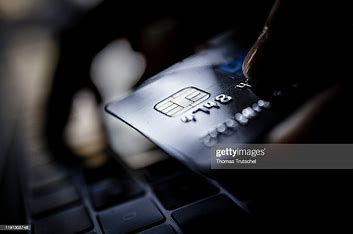**

---



The "Credit Card Fraudulent Detection" project is a comprehensive exploration of machine learning and anomaly detection techniques aimed at developing a robust system to identify and prevent credit card fraud. Credit card fraud is a significant concern in the financial sector, with potentially severe financial and security consequences for both consumers and businesses. This project investigates various methods to detect fraudulent transactions and minimize false positives.

Key aspects of the project include:

Machine Learning Models: The project explores the application of machine learning algorithms, including Decision Trees, Ensemble Learning (AdaBoost and Gradient Boosting), and XGBoost, to classify transactions as either legitimate or fraudulent. The performance of these models is assessed through rigorous evaluation.

Anomaly Detection Techniques: Anomaly detection methods, such as Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM, are investigated to identify unusual patterns in transactions that may indicate fraud. These techniques are especially useful for detecting rare and abnormal events.

Model Evaluation: The project emphasizes the importance of data preprocessing, hyperparameter tuning, and thorough model evaluation. Accurate fraud detection while minimizing false positives is crucial, and the project provides insights into achieving this balance.

Fraud Detection in Practice: The project discusses the practical application of the developed models and techniques in real-world scenarios, helping businesses and financial institutions protect their assets and their customers' financial transactions.

By applying the knowledge and insights gained from this project, organizations can enhance their ability to detect and prevent credit card fraud. This project serves as a valuable resource for building a reliable and efficient credit card fraud detection system, contributing to financial security and customer trust.

Import necessary libraries

---



In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn.model_selection import train_test_split
import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize']=15,12
Labels = ['Normal', 'Fraud']

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path_to_file1= '/content/drive/MyDrive/fraudTrain.csv'
path_to_file2 = '/content/drive/My Drive/fraudTest.csv'



In [ ]:
import shutil

# Copy the file to the current working directory in Colab
shutil.copy(path_to_file1, './fraudTrain.csv')


'./fraudTrain.csv'

In [ ]:
# Copy the second file to the current working directory in Colab
shutil.copy(path_to_file2, './fraudTest.csv')

'./fraudTest.csv'

Import Dataset

---



In [ ]:
fraud_train = pd.read_csv('/content/fraudTrain.csv')

In [ ]:
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
fraud_test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
fraud_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
fraud_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
fraud_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
fraud_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
print(fraud_train.shape,fraud_test.shape)

(1296675, 23) (555719, 23)


In [ ]:
fraud_train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
fraud_test['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [ ]:
fraud_train.shape

(1296675, 23)

In [ ]:
fraud_test.shape

(555719, 23)

joined both fraud_train and fraud _test to a single dataframe all_data

In [ ]:
all_data = pd.concat([fraud_train, fraud_test], axis =0)

In [ ]:
all_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
all_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
all_data.duplicated().sum()

0

change all code with all_data
refer health 4th march 23, realtime case study inance domain,regressionproblem advanced houseprice,manufacturing 16th oct22,mechanical domainproject,bankingdomainproject12thmarc23,banking domIN18dec22,missingvalueimputation

In [ ]:
all_data.shape

(1852394, 23)

In [ ]:
#sns.scatterplot(x=fraud_train['unix_time'], y=fraud_train['trans_num'],hue= fraud_train['dob'] )

In [ ]:
all_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
all_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Handling missing values

---



In [ ]:
all_data.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

<Axes: >

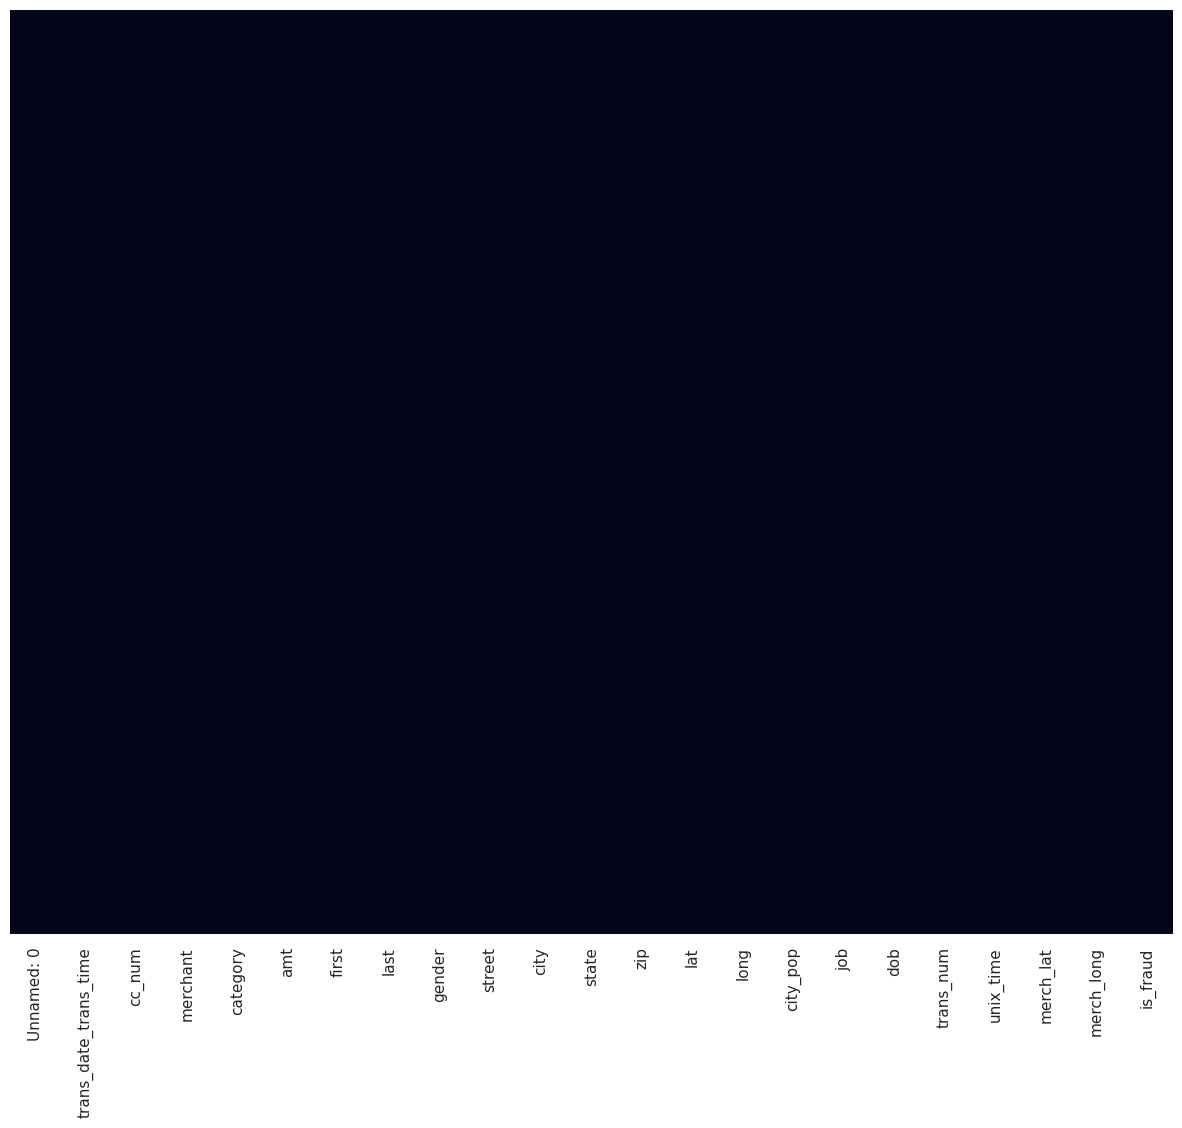

In [ ]:
sns.heatmap(all_data.isnull(), yticklabels = False, cbar = False)

Now there are no missing or null values

In [ ]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


In [ ]:
# Customize the appearance using a color palette
styled_summary = all_data.describe().style.background_gradient(cmap="Set2")

# Display the styled summary
styled_summary

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,537193.440000,417386038393710400.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,366910.960483,1309115265318734848.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,231549.000000,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,463098.000000,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,833575.750000,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,1296674.000000,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


In [ ]:
all_data.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000063,0.000949,0.000370,0.000239,-0.000610,-0.000880,0.174527,0.000211,-0.000611,0.000524
cc_num,0.000063,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,0.000949,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.000370,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000239,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.000610,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.000880,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.174527,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,0.000211,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.000611,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [ ]:
all_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
all_data['first'].value_counts()

Christopher    38112
Robert         30743
Jessica        29236
David          28564
Michael        28539
               ...  
Nicole             9
Phyllis            8
Molly              8
Angelica           7
Samantha           7
Name: first, Length: 355, dtype: int64

In [ ]:
all_data['last'].value_counts()

Smith        40940
Williams     33661
Davis        31434
Johnson      28590
Rodriguez    24879
             ...  
Strong           8
Freeman          8
Schaefer         7
Bartlett         7
Blake            7
Name: last, Length: 486, dtype: int64

In [ ]:
all_data['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [ ]:
all_data['street'].value_counts()

444 Robert Mews               4392
908 Brooks Brook              4392
5796 Lee Coves Apt. 286       4386
03512 Jackson Ports           4386
320 Nicholson Orchard         4386
                              ... 
7065 Whitney Mountains           7
610 Pacheco Parkway              7
7281 Joshua Mills Apt. 077       7
5273 Joseph Isle Suite 518       7
007 Tonya Isle Suite 299         6
Name: street, Length: 999, dtype: int64

In [ ]:
all_data['city'].value_counts()

Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Chattanooga       7
Karns City        7
Vacaville         7
Streator          7
Wever             6
Name: city, Length: 906, dtype: int64

In [ ]:
all_data['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [ ]:
all_data['job'].value_counts()

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: job, Length: 497, dtype: int64

In [ ]:
all_data['merchant'].value_counts()

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64

In [ ]:
all_data['state'].value_counts()

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

In [ ]:
all_data['trans_num'].value_counts()

0b242abb623afc578575680df30655b9    1
ad44105b2defec28687e0c0c00db0dd2    1
fff81009b323191d0a427a2af21e5bc7    1
2341854d7594722011878c08ba3819dd    1
f7f00d638b16a8b1045d8a8978b607bd    1
                                   ..
74745c7e44a5172e919b2ea2538d0edb    1
71d44820f944faa2ed912043e859df48    1
986d5219c856c1ddcafe1a4ad35b844e    1
cf4fca8a9847c75240202201324dd34f    1
1765bb45b3aa3224b4cdcb6e7a96cee3    1
Name: trans_num, Length: 1852394, dtype: int64

In [ ]:
all_data['is_fraud'].value_counts(normalize = True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [ ]:
all_data['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,12
LABELS = ['Normal', 'Fraud']

<Axes: >

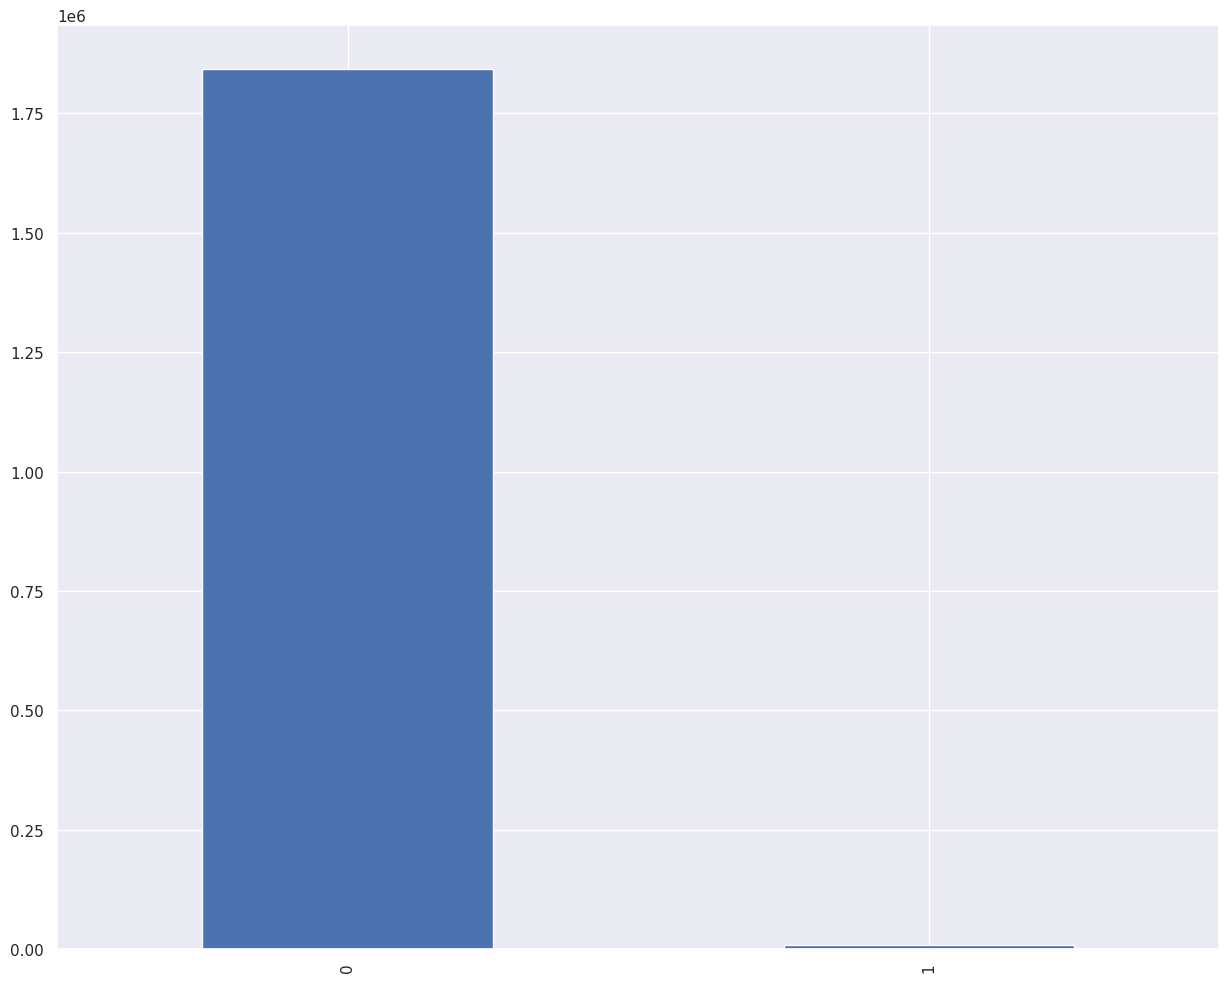

In [ ]:
all_data['is_fraud'].value_counts().plot(kind = 'bar')

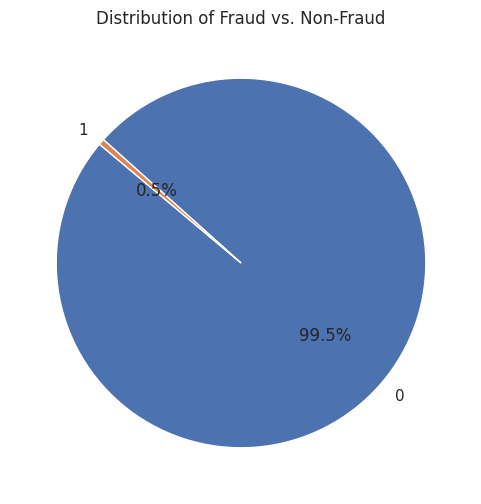

In [ ]:
plt.figure(figsize=(6, 6))  # Define the figure size
plt.pie(all_data['is_fraud'].value_counts(), labels=all_data['is_fraud'].value_counts().index, autopct='%1.1f%%', startangle=140)  # Create the pie chart
plt.title('Distribution of Fraud vs. Non-Fraud')  # Set the title
plt.show()  # Display the chart

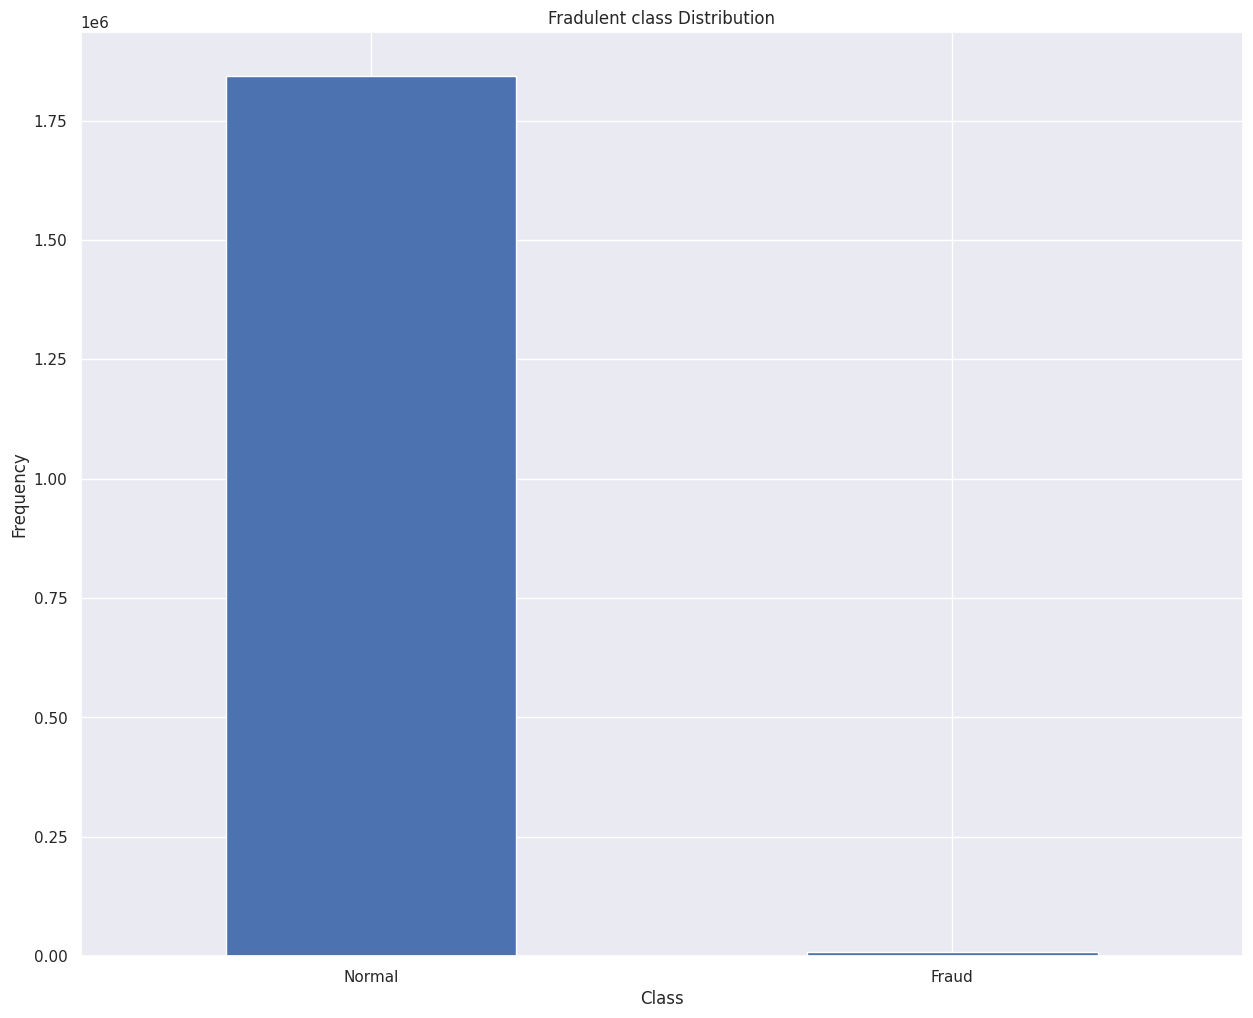

In [ ]:
class_count = pd.value_counts(all_data['is_fraud'], sort = True)
class_count.plot(kind = 'bar', rot = 0)

plt.title("Fradulent class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
corr= all_data.corr()
corr

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000063,0.000949,0.000370,0.000239,-0.000610,-0.000880,0.174527,0.000211,-0.000611,0.000524
cc_num,0.000063,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,0.000949,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.000370,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000239,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.000610,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.000880,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.174527,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,0.000211,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.000611,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999


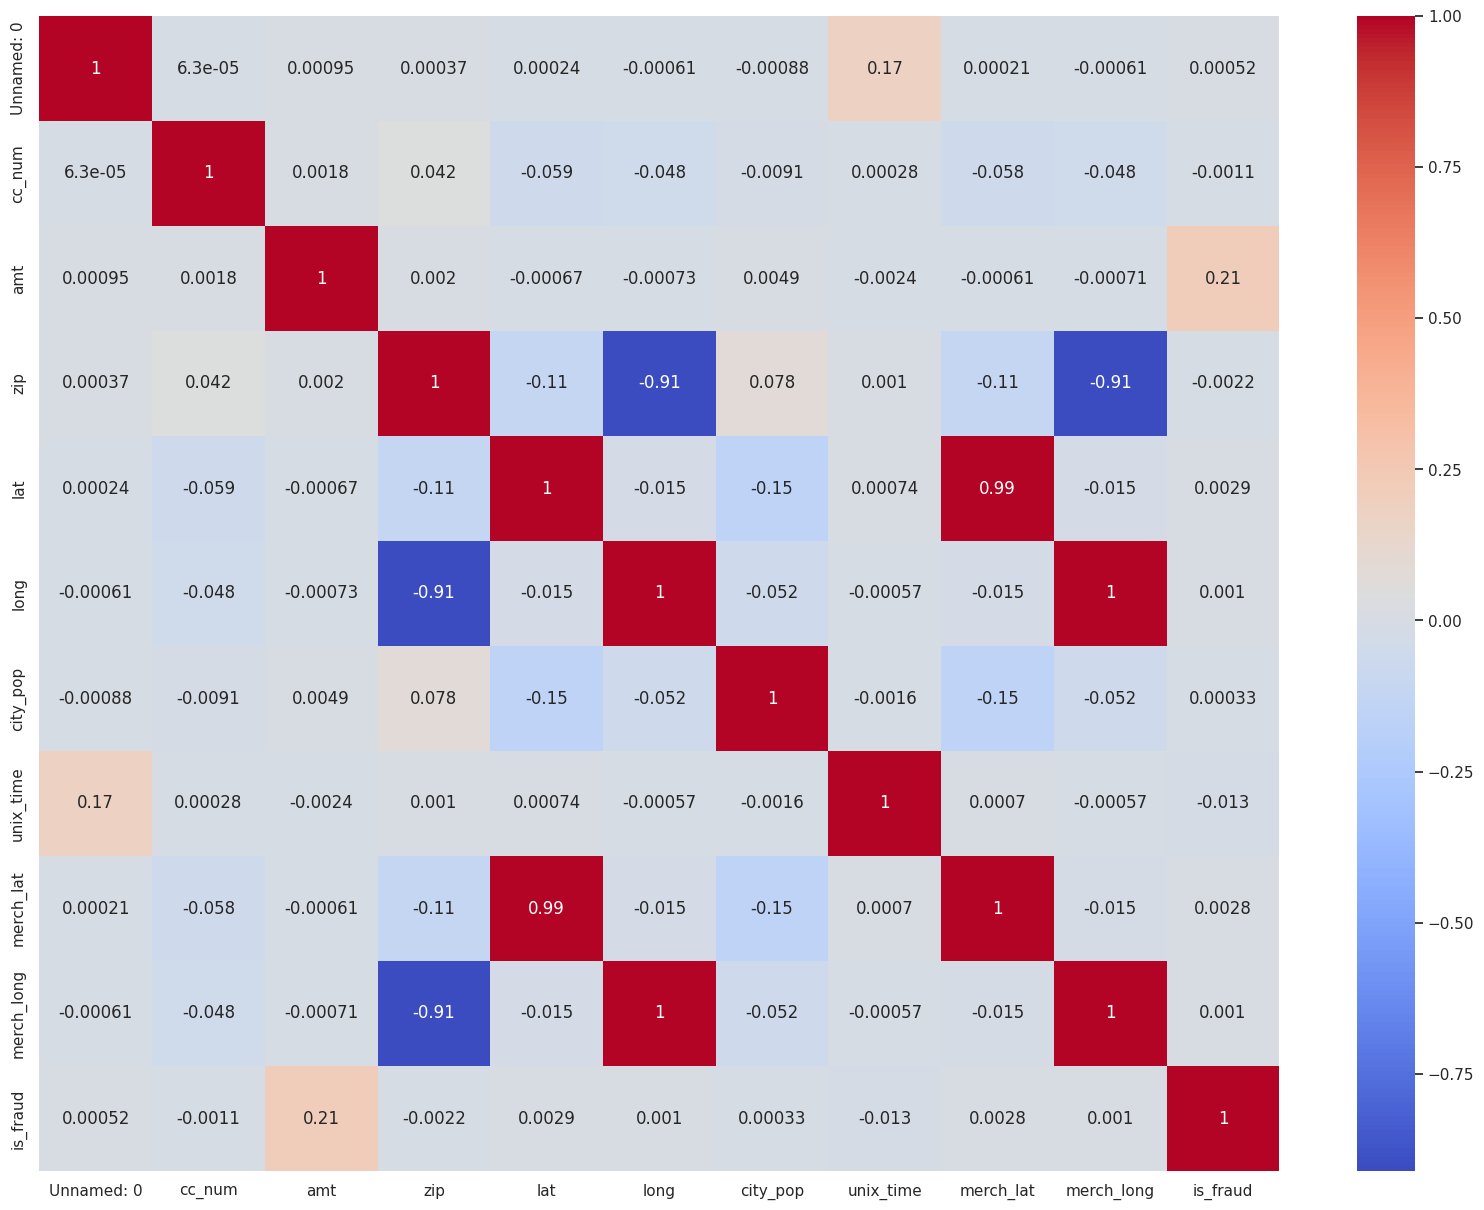

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(all_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(all_data)
profile.to_file(output_file='all_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Fraud = all_data[all_data['is_fraud']==1]
Normal = all_data[all_data['is_fraud']==0]
print(Fraud.shape, Normal.shape)

(9651, 23) (1842743, 23)


percentage of fraud

---



In [ ]:
9651/(9651+1842743)

0.005210014716091717

Description of fraud and normal

---



In [ ]:
Normal.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
Fraud.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

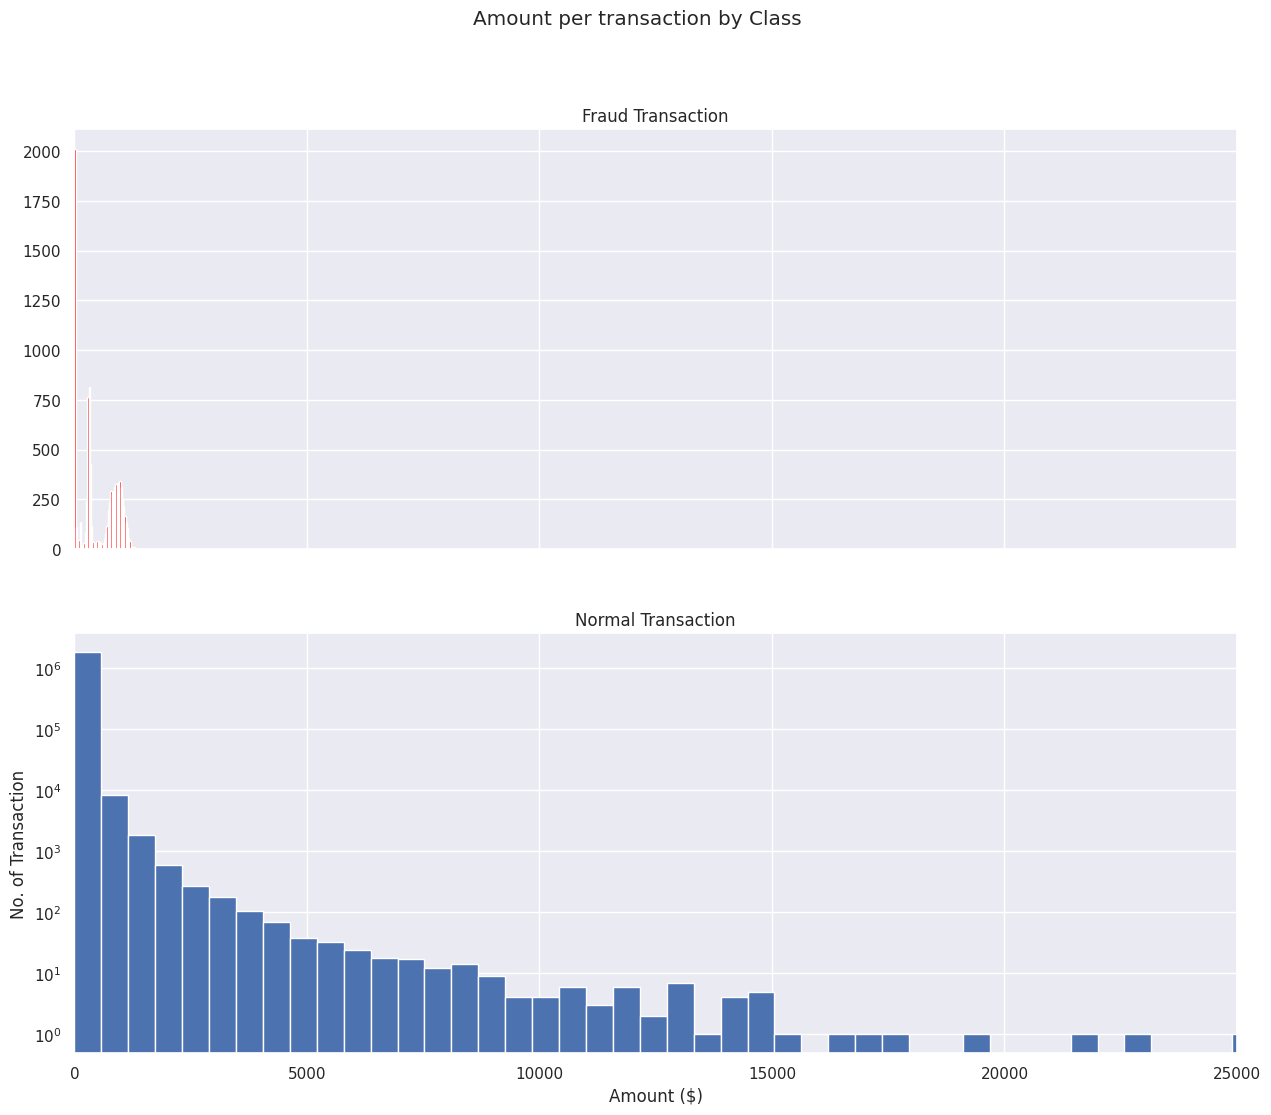

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by Class")
bins = 50
ax1.hist(Fraud.amt, bins = bins,color='red')
ax1.set_title('Fraud Transaction')

ax2.hist(Normal.amt, bins=bins)
ax2.set_title('Normal Transaction')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

lets see this work or not divide d normal to a small fraction

In [ ]:
# Downsample the normal transactions by taking a random sample
normal_data_sample =Normal.sample(frac=0.01)

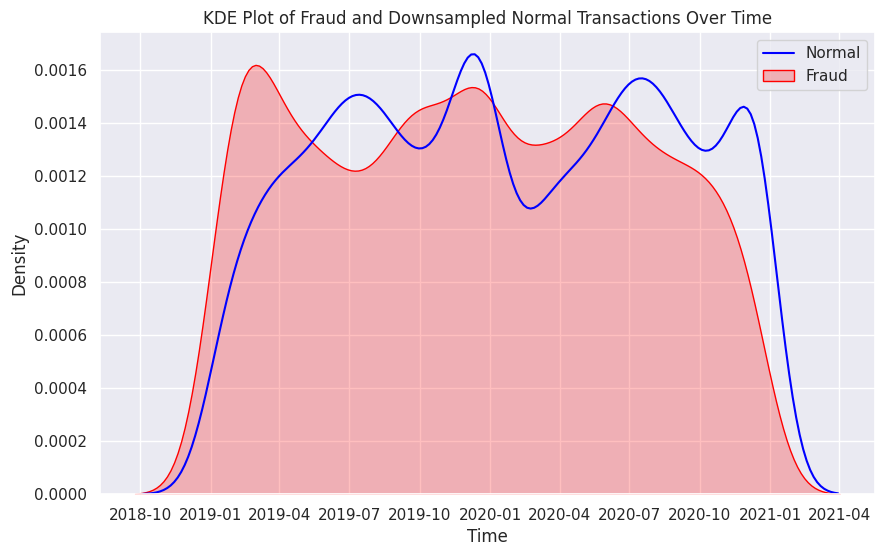

In [ ]:
# Convert the "trans_date_trans_time" column to a datetime type
Fraud['trans_date_trans_time'] = pd.to_datetime(Fraud['trans_date_trans_time'])
normal_data_sample['trans_date_trans_time'] = pd.to_datetime(normal_data_sample['trans_date_trans_time'])

# Create a density plot to visualize the distribution of downsampled normal transactions over time
plt.figure(figsize=(10, 6))
sns.kdeplot(data=normal_data_sample, x='trans_date_trans_time', color='blue', label='Normal')
sns.kdeplot(data=Fraud, x='trans_date_trans_time', color='red', label='Fraud', shade=True)
plt.title("KDE Plot of Fraud and Downsampled Normal Transactions Over Time")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
Fraud['trans_date_trans_time'] = pd.to_datetime(Fraud['trans_date_trans_time'])
normal_data_sample['trans_date_trans_time'] = pd.to_datetime(normal_data_sample['trans_date_trans_time'])

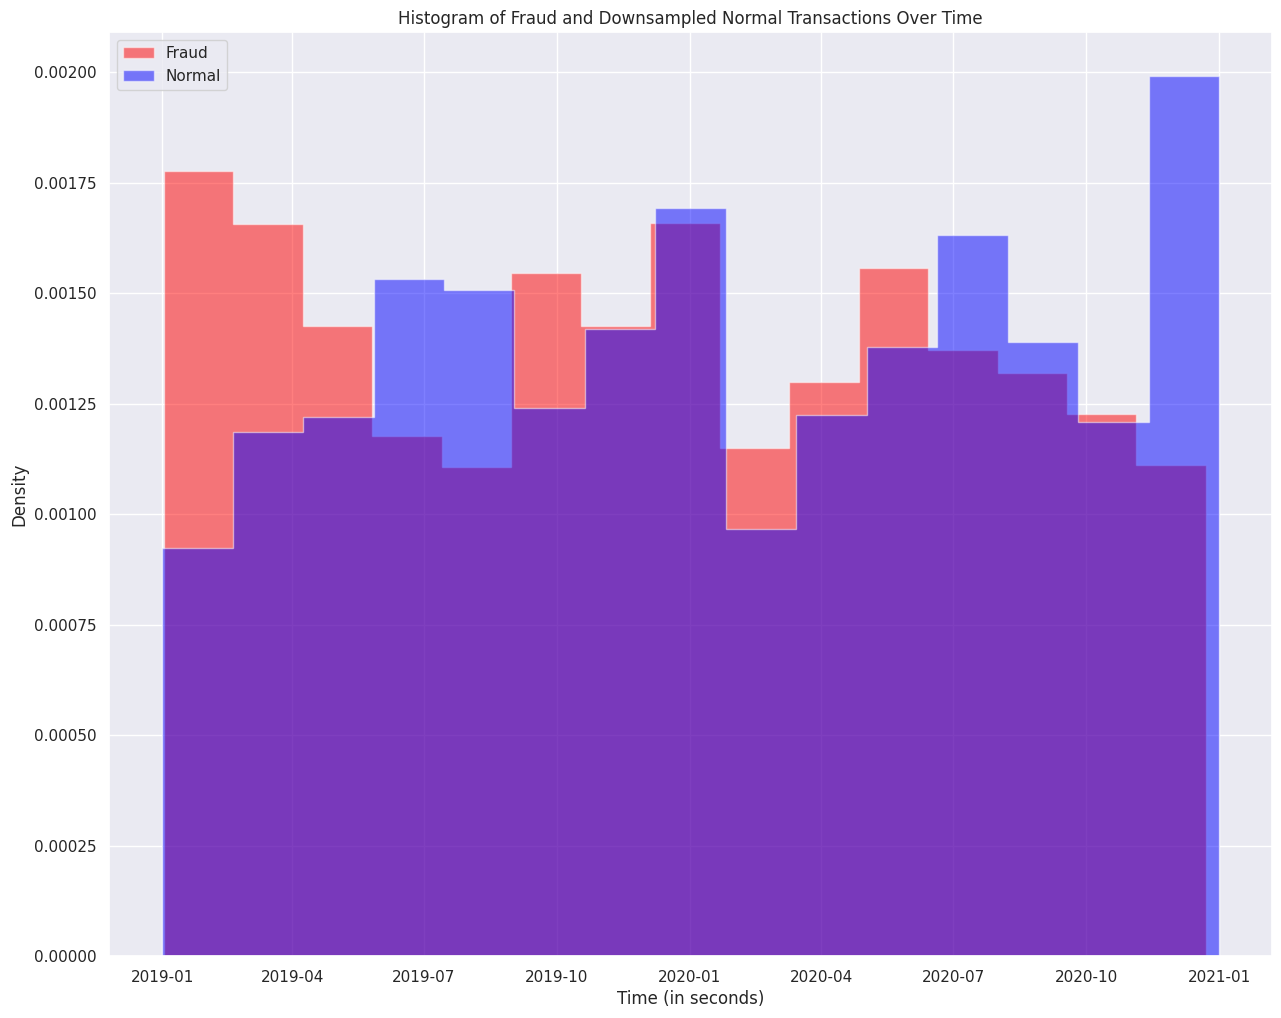

In [ ]:
# Create histograms for both fraud and downsampled normal transactions
bins = 15# You can adjust the number of bins
plt.hist(Fraud['trans_date_trans_time'], bins=bins, alpha=0.5, color='red', label='Fraud', density=True, histtype='stepfilled')
plt.hist(normal_data_sample['trans_date_trans_time'], bins=bins, alpha=0.5, color='blue', label='Normal', density=True, histtype='stepfilled')
plt.title("Histogram of Fraud and Downsampled Normal Transactions Over Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Density")
plt.legend()
plt.show()

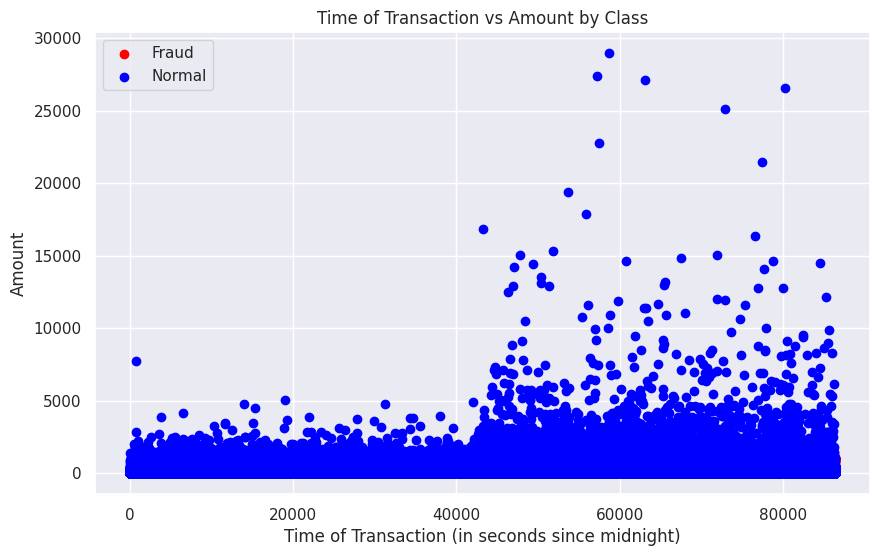

In [ ]:
# Convert the "trans_date_trans_time" column to datetime for Fraud and Normal
Fraud['trans_date_trans_time'] = pd.to_datetime(Fraud['trans_date_trans_time'])
Normal['trans_date_trans_time'] = pd.to_datetime(Normal['trans_date_trans_time'])

# Extract the time component and convert it to seconds since midnight
Fraud['trans_time'] = Fraud['trans_date_trans_time'].dt.hour * 3600 + Fraud['trans_date_trans_time'].dt.minute * 60 + Fraud['trans_date_trans_time'].dt.second
Normal['trans_time'] = Normal['trans_date_trans_time'].dt.hour * 3600 + Normal['trans_date_trans_time'].dt.minute * 60 + Normal['trans_date_trans_time'].dt.second

# Create a scatter plot to compare the time of transactions for fraud and normal
plt.figure(figsize=(10, 6))
plt.scatter(Fraud['trans_time'], Fraud['amt'], color='red', label='Fraud')
plt.scatter(Normal['trans_time'], Normal['amt'], color='blue', label='Normal')
plt.title("Time of Transaction vs Amount by Class")
plt.xlabel("Time of Transaction (in seconds since midnight)")
plt.ylabel("Amount")
plt.legend()
plt.show()

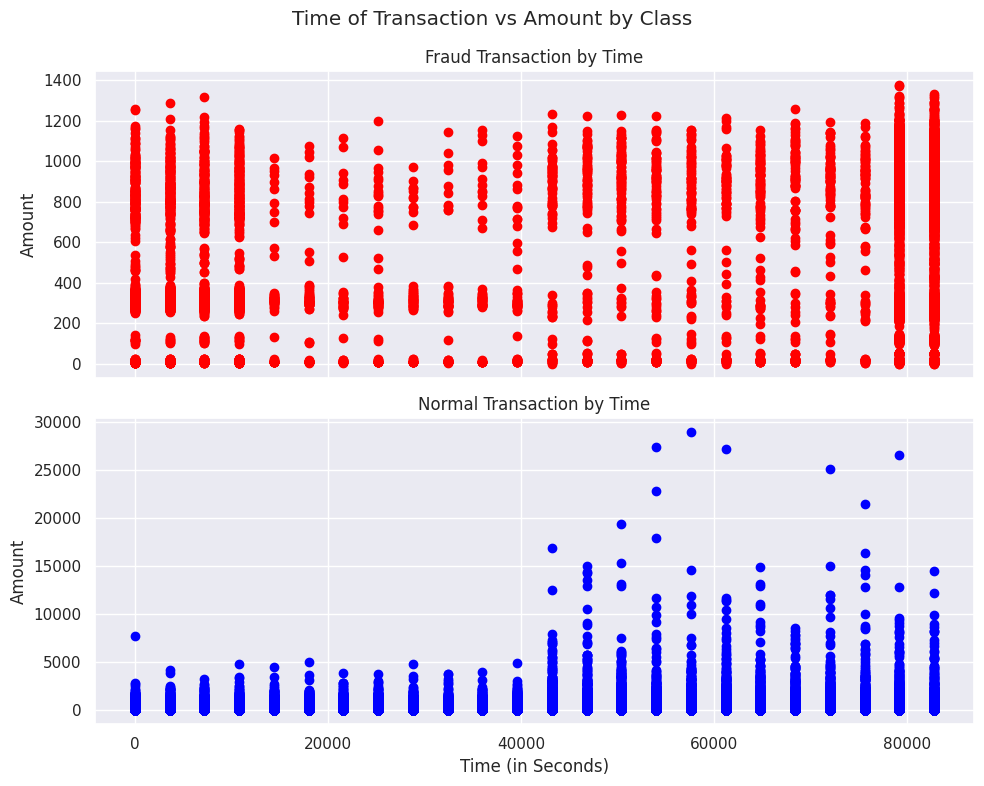

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.suptitle("Time of Transaction vs Amount by Class")

# Plot the scatter plot for Fraud transactions
ax1.scatter(Fraud['trans_time'], Fraud['amt'], color='red')
ax1.set_title('Fraud Transaction by Time')
ax1.set_ylabel("Amount")

# Plot the scatter plot for Normal transactions
ax2.scatter(Normal['trans_time'], Normal['amt'], color='blue')
ax2.set_title('Normal Transaction by Time')
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Amount")

plt.tight_layout()
plt.show()

In [ ]:

# Convert the "trans_date_trans_time" column to datetime for Fraud and Normal
Fraud['trans_date_trans_time'] = pd.to_datetime(Fraud['trans_date_trans_time'])
Normal['trans_date_trans_time'] = pd.to_datetime(Normal['trans_date_trans_time'])

# Calculate the time in seconds since midnight using total_seconds()
Fraud['trans_time'] = (Fraud['trans_date_trans_time'] - Fraud['trans_date_trans_time'].dt.normalize()).dt.total_seconds()
Normal['trans_time'] = (Normal['trans_date_trans_time'] - Normal['trans_date_trans_time'].dt.normalize()).dt.total_seconds()


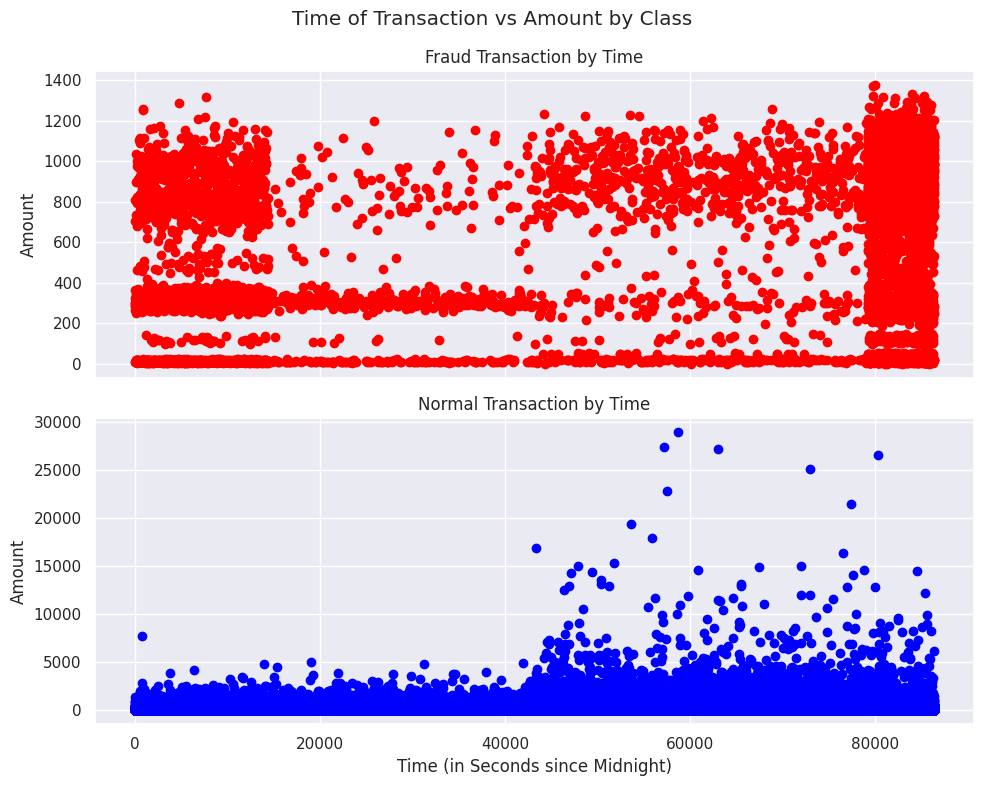

In [ ]:
# Create subplots for Fraud and Normal transactions
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.suptitle("Time of Transaction vs Amount by Class")

# Plot the scatter plot for Fraud transactions
ax1.scatter(Fraud['trans_time'], Fraud['amt'], color='red')
ax1.set_title('Fraud Transaction by Time')
ax1.set_ylabel("Amount")

# Plot the scatter plot for Normal transactions
ax2.scatter(Normal['trans_time'], Normal['amt'], color='blue')
ax2.set_title('Normal Transaction by Time')
ax2.set_xlabel("Time (in Seconds since Midnight)")
ax2.set_ylabel("Amount")

plt.tight_layout()
plt.show()

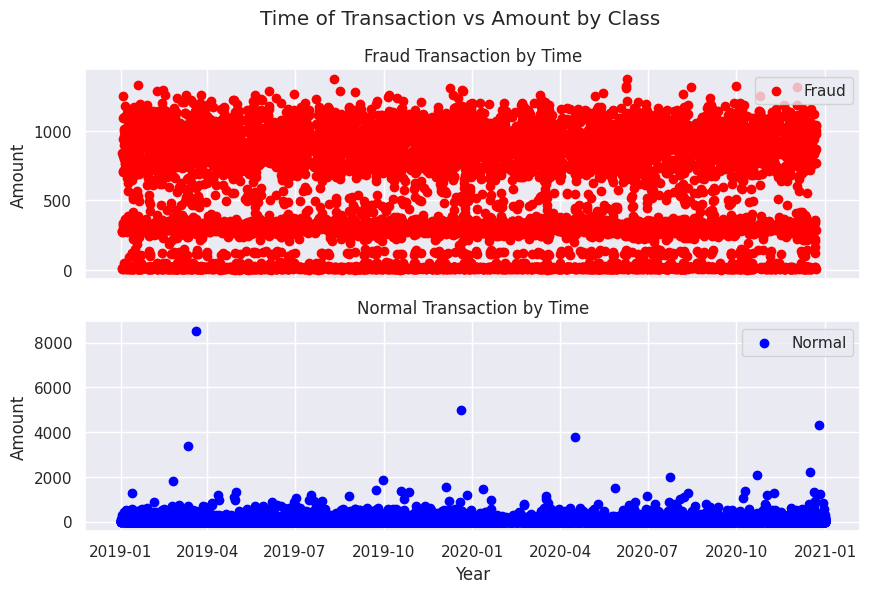

In [ ]:
# Create a scatter plot for both fraud and normal transactions
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.suptitle("Time of Transaction vs Amount by Class")

ax1.scatter(Fraud['trans_date_trans_time'], Fraud['amt'], color='red', label='Fraud')
ax1.set_title('Fraud Transaction by Time')
ax1.set_ylabel("Amount")
ax1.legend()

ax2.scatter(normal_data_sample['trans_date_trans_time'], normal_data_sample['amt'], color='blue', label='Normal')
ax2.set_title('Normal Transaction by Time')
ax2.set_xlabel("Year")
ax2.set_ylabel("Amount")
ax2.legend()

plt.show()

Time of TRanscation

---



In [ ]:
from datetime import datetime
all_data['year'] = pd.DatetimeIndex(all_data['trans_date_trans_time']).year
all_data['month'] = pd.DatetimeIndex(all_data['trans_date_trans_time']).month
all_data['date'] = pd.DatetimeIndex(all_data['trans_date_trans_time']).day
all_data['week_day'] =pd.DatetimeIndex(all_data['trans_date_trans_time']).weekday
all_data['start_time'] = pd.DatetimeIndex(all_data['trans_date_trans_time']).time
all_data['hour'] = pd.DatetimeIndex(all_data['trans_date_trans_time']).hour
all_data['min']= pd.DatetimeIndex(all_data['trans_date_trans_time']).minute
all_data['sec']=  pd.DatetimeIndex(all_data['trans_date_trans_time']).second

In [ ]:
all_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,year,month,date,week_day,start_time,hour,min,sec
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-82.048315,0,2019,1,1,1,00:00:18,0,0,18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.186462,0,2019,1,1,1,00:00:44,0,0,44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.154481,0,2019,1,1,1,00:00:51,0,0,51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.561071,0,2019,1,1,1,00:01:16,0,1,16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-78.632459,0,2019,1,1,1,00:03:06,0,3,6


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 25.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357555 sha256=bb84471d8055aad9bd2d423dea67f6ede560efa777dcc108dbf6271dd567f764
  Stored in directory: /tmp/pip-ephem-wheel-cache-py85qekm/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.6.1
    Uninstalling ydata-profiling-4.6.1:
      Successfully uninstalled ydata-profiling-4.6.1


In [ ]:
#import os
#os._exit(00)

In [ ]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

<ipython-input-1-e03ae1e4ccf5>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = pandas_profiling.ProfileReport(all_data)
profile.to_file(output_file = 'all_data2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
all_data = all_data.drop(['trans_date_trans_time'], axis =1)

In [ ]:
all_data.dtypes

Unnamed: 0      int64
cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
year            int64
month           int64
date            int64
week_day        int64
start_time     object
hour            int64
min             int64
sec             int64
dtype: object

In [ ]:
all_data.year.unique()

array([2019, 2020])

In [ ]:
all_data.month.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
all_data.date.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
all_data.week_day.unique()

array([1, 2, 3, 4, 5, 6, 0])

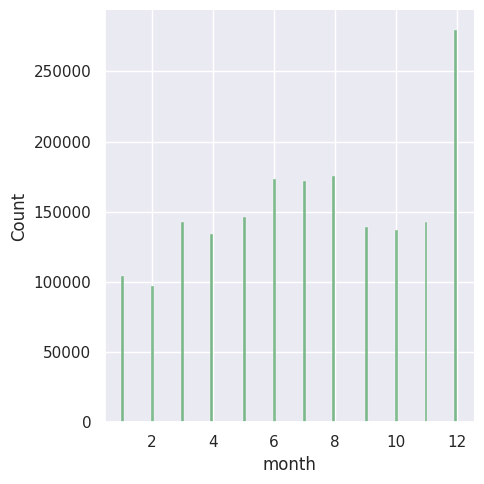

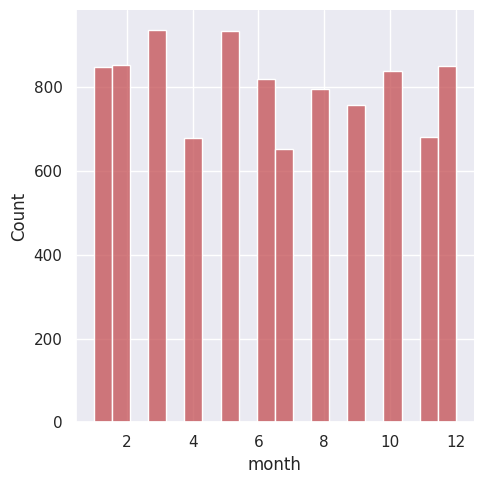

In [ ]:
sns.displot(all_data[all_data.is_fraud== 0]['month'], color ='g');
sns.displot(all_data[all_data.is_fraud== 1]['month'], color ='r');

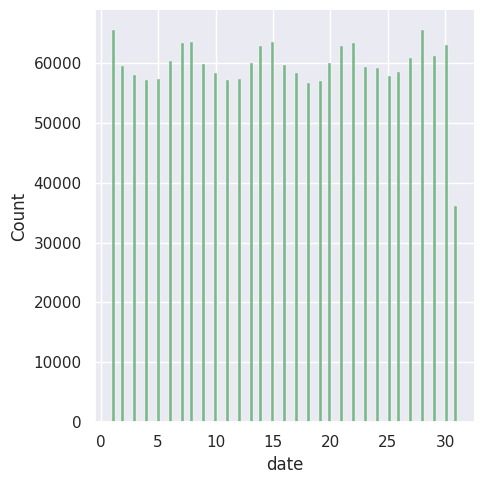

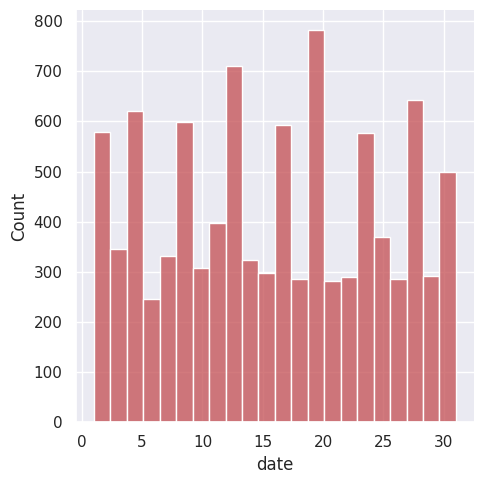

In [ ]:
sns.displot(all_data[all_data.is_fraud== 0]['date'], color ='g');
sns.displot(all_data[all_data.is_fraud == 1]['date'], color ='r');

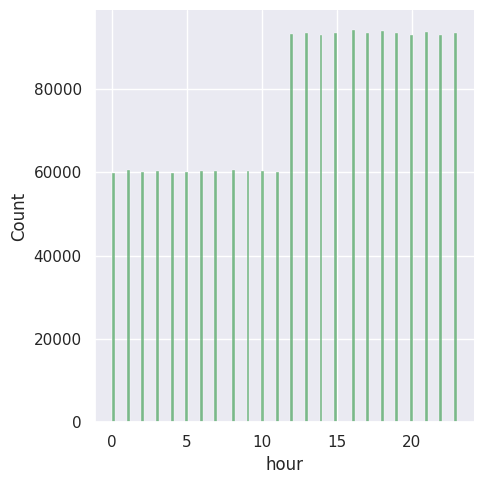

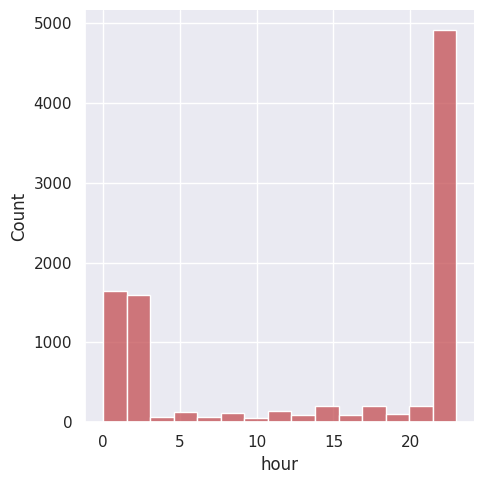

In [ ]:
sns.displot(all_data[all_data.is_fraud== 0]['hour'], color ='g');
sns.displot(all_data[all_data.is_fraud== 1]['hour'], color ='r');

Using Label Encoder

---



check null values use one hot or label encoders to convert complete data frame,use standard scaler,pca

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to label encode
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'start_time']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each of the specified columns
for column in categorical_columns:
    all_data[column] = label_encoder.fit_transform(all_data[column])

# Now, the specified categorical columns are encoded with numeric values


In [ ]:
all_data.head(2)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year,month,date,week_day,start_time,hour,min,sec
0,0,2703186189652095,514,8,4.97,164,18,0,576,532,...,-82.048315,0,2019,1,1,1,18,0,0,18
1,1,630423337322,241,4,107.23,312,161,0,439,619,...,-118.186462,0,2019,1,1,1,44,0,0,44


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cc_num      int64  
 2   merchant    int64  
 3   category    int64  
 4   amt         float64
 5   first       int64  
 6   last        int64  
 7   gender      int64  
 8   street      int64  
 9   city        int64  
 10  state       int64  
 11  zip         int64  
 12  lat         float64
 13  long        float64
 14  city_pop    int64  
 15  job         int64  
 16  dob         int64  
 17  trans_num   int64  
 18  unix_time   int64  
 19  merch_lat   float64
 20  merch_long  float64
 21  is_fraud    int64  
 22  year        int64  
 23  month       int64  
 24  date        int64  
 25  week_day    int64  
 26  start_time  int64  
 27  hour        int64  
 28  min         int64  
 29  sec         int64  
dtypes: float64(5), int64(25)
memory usage: 470.4 MB


In [ ]:
#all_data.convert_dtypes

use standard scalar

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['amt','lat','long','merch_lat','merch_long']
all_data[scaler_columns] = scaler.fit_transform(all_data[scaler_columns])

In [ ]:
all_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year,month,date,week_day,start_time,hour,min,sec
0,0,2703186189652095,514,8,-0.408741,164,18,0,576,532,...,0.594463,0,2019,1,1,1,18,0,0,18
1,1,630423337322,241,4,0.233378,312,161,0,439,619,...,-2.031915,0,2019,1,1,1,44,0,0,44
2,2,38859492057661,390,0,0.942184,116,386,1,610,474,...,-1.593535,0,2019,1,1,1,51,0,0,51
3,3,3534093764340240,360,2,-0.157381,165,468,1,945,84,...,-1.623084,0,2019,1,1,1,76,0,1,16
4,4,375534208663984,297,9,-0.176470,339,153,1,422,217,...,0.842714,0,2019,1,1,1,186,0,3,6


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cc_num      int64  
 2   merchant    int64  
 3   category    int64  
 4   amt         float64
 5   first       int64  
 6   last        int64  
 7   gender      int64  
 8   street      int64  
 9   city        int64  
 10  state       int64  
 11  zip         int64  
 12  lat         float64
 13  long        float64
 14  city_pop    int64  
 15  job         int64  
 16  dob         int64  
 17  trans_num   int64  
 18  unix_time   int64  
 19  merch_lat   float64
 20  merch_long  float64
 21  is_fraud    int64  
 22  year        int64  
 23  month       int64  
 24  date        int64  
 25  week_day    int64  
 26  start_time  int64  
 27  hour        int64  
 28  min         int64  
 29  sec         int64  
dtypes: float64(5), int64(25)
memory usage: 470.4 MB


Data visualisation of Fraud and Normal Transactions over Time

---



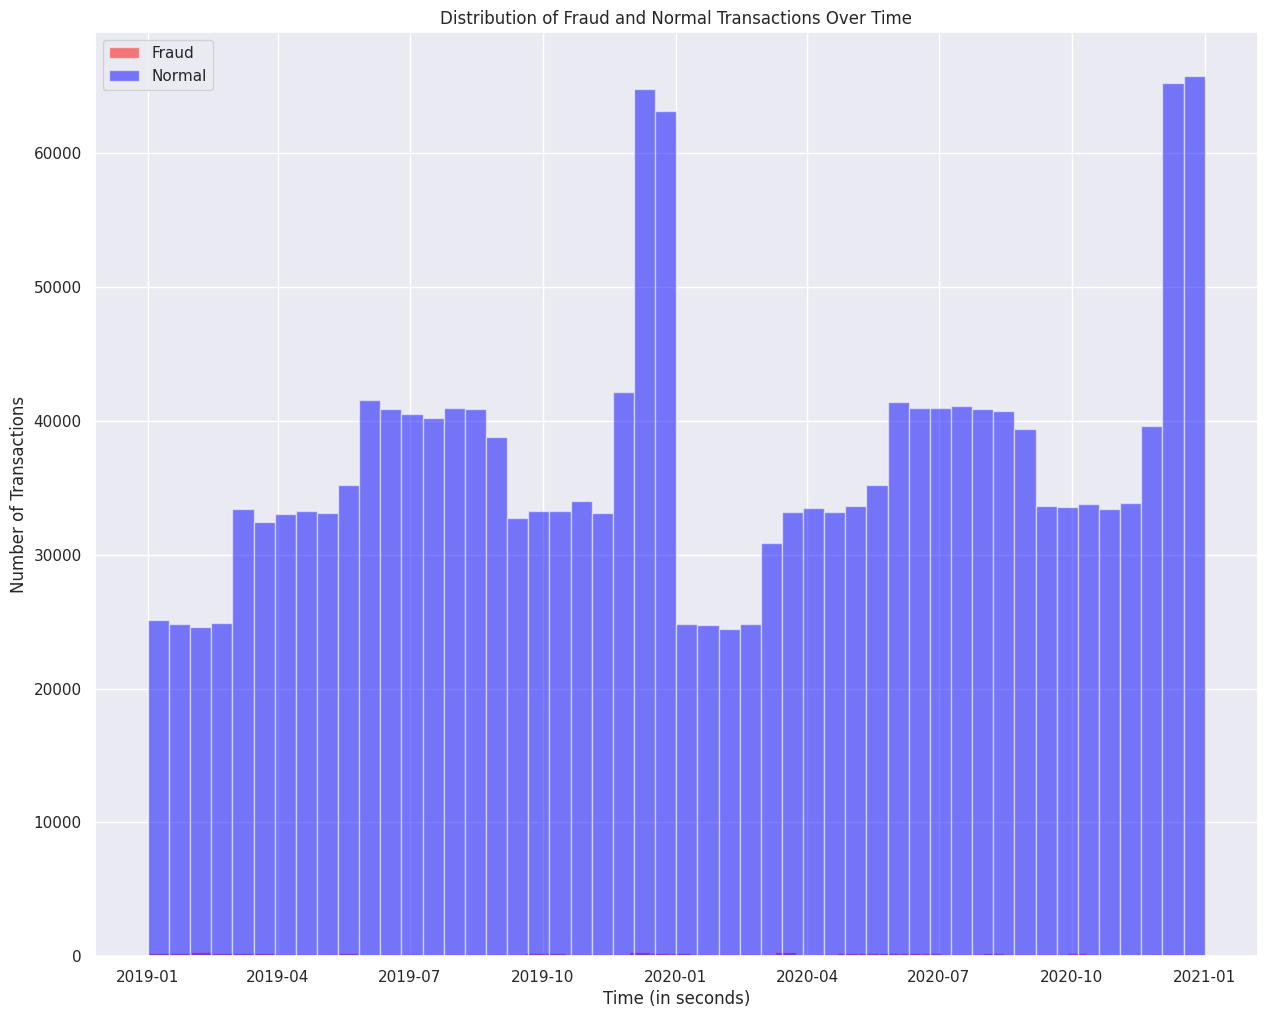

In [ ]:
# Create a histogram or bar chart to visualize the distribution of both fraud and normal transactions over year
plt.hist(Fraud['trans_date_trans_time'], bins=50, alpha=0.5, color='red', label='Fraud')
plt.hist(Normal['trans_date_trans_time'], bins=50, alpha=0.5, color='blue', label='Normal')
plt.title("Distribution of Fraud and Normal Transactions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

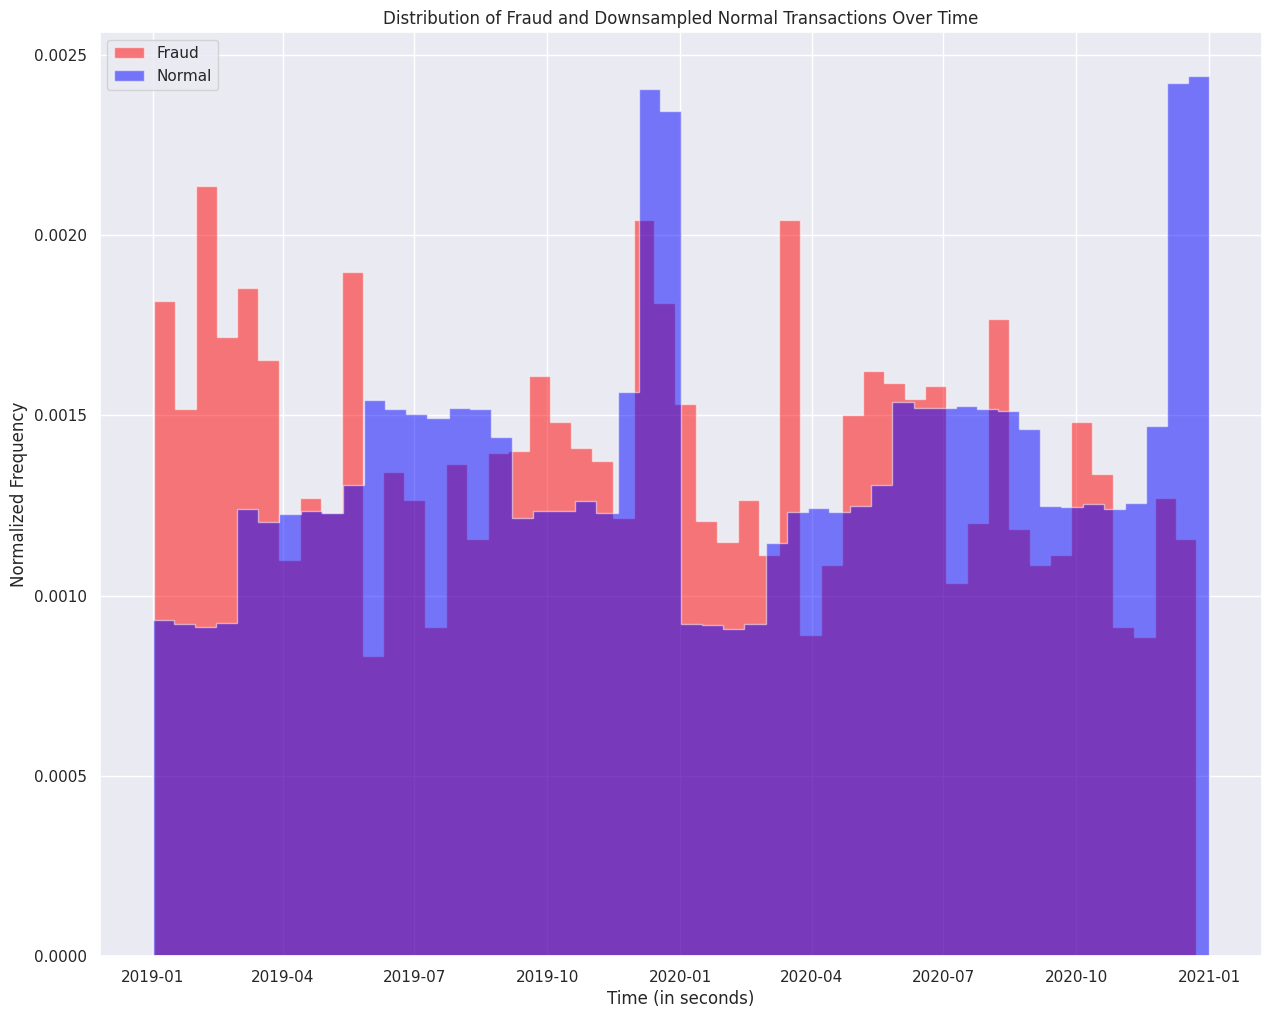

In [ ]:
# Create a histogram or bar chart to visualize the distribution of both fraud and downsampled normal transactions over year
plt.hist(Fraud['trans_date_trans_time'], bins=50, alpha=0.5, color='red', label='Fraud', density=True, histtype='stepfilled')
plt.hist(Normal['trans_date_trans_time'], bins=50, alpha=0.5, color='blue', label='Normal', density=True, histtype='stepfilled')
plt.title("Distribution of Fraud and Downsampled Normal Transactions Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.show()

In [ ]:
all_data.shape

(1852394, 30)

# we are taking 10% data only for building a model

**Model Building**

---



In [ ]:
data1 =all_data.sample(frac= 0.2, random_state =1000)


In [ ]:
data1.shape

(370479, 30)

In [ ]:
fraud= data1[data1['is_fraud']==1]
valid = data1[data1['is_fraud']==0]

In [ ]:
print(fraud.shape)

(1897, 30)


In [ ]:
print(valid.shape)

(368582, 30)


In [ ]:
outlier_fraction = 1897/(1897+368582)

In [ ]:
print("Outlier fraction is:", outlier_fraction)

Outlier fraction is: 0.0051203981872116906


In [ ]:
data1.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year,month,date,week_day,start_time,hour,min,sec
399954,399954,4826655832045236,362,6,-0.293014,319,139,0,531,49,...,1.428572,0,2019,6,30,6,85489,23,44,49
206978,206978,4710792708725663,234,7,0.836315,189,25,1,957,143,...,0.420451,0,2019,4,15,0,60658,16,50,58
841069,841069,3543591270174051,298,9,-0.319010,227,239,0,699,28,...,0.842080,0,2019,12,13,4,77188,21,26,28
551345,551345,573860193545,50,7,-0.211320,85,223,1,40,891,...,0.175782,0,2020,12,30,2,62821,17,27,1
702460,702460,376028110684021,135,3,-0.113866,0,308,1,638,501,...,-0.185906,0,2019,10,27,6,16575,4,36,15


In [ ]:
data1.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'date', 'week_day', 'start_time', 'hour',
       'min', 'sec'],
      dtype='object')

In [ ]:
columns = data1.drop(['Unnamed: 0','is_fraud'],axis =1)
target = data1['is_fraud']

In [ ]:
columns.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,year,month,date,week_day,start_time,hour,min,sec
399954,4826655832045236,362,6,-0.293014,319,139,0,531,49,19,...,0.695682,1.428572,2019,6,30,6,85489,23,44,49
206978,4710792708725663,234,7,0.836315,189,25,1,957,143,15,...,0.456844,0.420451,2019,4,15,0,60658,16,50,58
841069,3543591270174051,298,9,-0.319010,227,239,0,699,28,38,...,0.448928,0.842080,2019,12,13,4,77188,21,26,28
551345,573860193545,50,7,-0.211320,85,223,1,40,891,14,...,0.870957,0.175782,2020,12,30,2,62821,17,27,1
702460,376028110684021,135,3,-0.113866,0,308,1,638,501,24,...,0.098685,-0.185906,2019,10,27,6,16575,4,36,15


In [ ]:
target.head()

399954    0
206978    0
841069    0
551345    0
702460    0
Name: is_fraud, dtype: int64

Split the data into Training and Test

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns, target, train_size = 0.75, random_state =125, stratify = target )

Using Machine Learning Model

---



Logistic Regression

---



In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)

In [ ]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test))

Confusion Matrix - Training : [[276436      0]
 [  1423      0]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[92146     0]
 [  474     0]]


In [ ]:
print(classification_report(y_train, y_pred_train))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    276436
           1       0.00      0.00      0.00      1423

    accuracy                           0.99    277859
   macro avg       0.50      0.50      0.50    277859
weighted avg       0.99      0.99      0.99    277859

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     92146
           1       0.00      0.00      0.00       474

    accuracy                           0.99     92620
   macro avg       0.50      0.50      0.50     92620
weighted avg       0.99      0.99      0.99     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test))

Accuracy - Training : 0.9948786974688602
*************************************************************************************************************************************************
Accuracy - Test : 0.9948823148348089


ERROR

---



In [ ]:
error = accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test)

In [ ]:
print(error)

-3.6173659487825915e-06


Ensemble Bagging

---



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier from sklearn.tree
base_estimator = DecisionTreeClassifier()

bgcl = BaggingClassifier(base_estimator= base_estimator,n_estimators = 50,random_state=1)
bgcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=1)

In [ ]:
y_pred_train_bg = bgcl.predict(x_train)
y_pred_test_bg = bgcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_bg))
print("**********************"*5)
print(classification_report(y_test,y_pred_test_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276436
           1       1.00      0.99      1.00      1423

    accuracy                           1.00    277859
   macro avg       1.00      1.00      1.00    277859
weighted avg       1.00      1.00      1.00    277859

**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92146
           1       0.94      0.74      0.83       474

    accuracy                           1.00     92620
   macro avg       0.97      0.87      0.91     92620
weighted avg       1.00      1.00      1.00     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_bg))
print("*************************************"*5)
print("Accuracy - Test  :", accuracy_score(y_test, y_pred_test_bg))

Accuracy - Training : 0.9999676094709907
*****************************************************************************************************************************************************************************************
Accuracy - Test  : 0.998402072986396


In [ ]:
print("Confusion Matrix - Training :\n", confusion_matrix(y_train, y_pred_train_bg))
print("*****************************"*5)
print("Confusion Matrix - Test :\n", confusion_matrix(y_test, y_pred_test_bg))

Confusion Matrix - Training :
 [[276436      0]
 [     9   1414]]
*************************************************************************************************************************************************
Confusion Matrix - Test :
 [[92123    23]
 [  125   349]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_dt))
print("*******************************************"*5)
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276436
           1       1.00      1.00      1.00      1423

    accuracy                           1.00    277859
   macro avg       1.00      1.00      1.00    277859
weighted avg       1.00      1.00      1.00    277859

***********************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92146
           1       0.76      0.76      0.76       474

    accuracy                           1.00     92620
   macro avg       0.88      0.88      0.88     92620
weighted avg       1.00      1.00      1.00     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_bg))
print("*************************************"*5)
print("Accuracy - Test  :", accuracy_score(y_test, y_pred_test_bg))

Accuracy - Training : 0.9999676094709907
*****************************************************************************************************************************************************************************************
Accuracy - Test  : 0.998402072986396


In [ ]:
print("Confusion Matrix - Training :\n", confusion_matrix(y_train, y_pred_train_dt))
print("*****************************"*5)
print("Confusion Matrix - Test :\n", confusion_matrix(y_test, y_pred_test_dt))

Confusion Matrix - Training :
 [[276436      0]
 [     0   1423]]
*************************************************************************************************************************************************
Confusion Matrix - Test :
 [[92034   112]
 [  116   358]]


Ensemble Learning- ADA BOOSTING

---



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state =1)
adbcl.fit(x_train , y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276436
           1       0.78      0.42      0.55      1423

    accuracy                           1.00    277859
   macro avg       0.89      0.71      0.77    277859
weighted avg       1.00      1.00      1.00    277859

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92146
           1       0.72      0.38      0.50       474

    accuracy                           1.00     92620
   macro avg       0.86      0.69      0.75     92620
weighted avg       1.00      1.00      1.00     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_adb))
print("*************************************"*5)
print("Accuracy - Test  :", accuracy_score(y_test, y_pred_test_adb))

Accuracy - Training : 0.996426244965972
*****************************************************************************************************************************************************************************************
Accuracy - Test  : 0.996069963290866


In [ ]:
print("Confusion Matrix - Training :\n", confusion_matrix(y_train, y_pred_train_adb))
print("*****************************"*5)
print("Confusion Matrix - Test :\n", confusion_matrix(y_test, y_pred_test_adb))

Confusion Matrix - Training :
 [[276263    173]
 [   820    603]]
*************************************************************************************************************************************************
Confusion Matrix - Test :
 [[92077    69]
 [  295   179]]


Gradient Boosting

---



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [ ]:
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276436
           1       0.89      0.33      0.48      1423

    accuracy                           1.00    277859
   macro avg       0.95      0.66      0.74    277859
weighted avg       1.00      1.00      1.00    277859

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92146
           1       0.87      0.30      0.44       474

    accuracy                           1.00     92620
   macro avg       0.93      0.65      0.72     92620
weighted avg       1.00      1.00      1.00     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_gd))
print("*************************************"*5)
print("Accuracy - Test  :", accuracy_score(y_test, y_pred_test_gd))

Accuracy - Training : 0.9963542660126179
*****************************************************************************************************************************************************************************************
Accuracy - Test  : 0.9961671345281796


In [ ]:
print("Confusion Matrix - Training :\n", confusion_matrix(y_train, y_pred_train_adb))
print("*****************************"*5)
print("Confusion Matrix - Test :\n", confusion_matrix(y_test, y_pred_test_adb))

Confusion Matrix - Training :
 [[276263    173]
 [   820    603]]
*************************************************************************************************************************************************
Confusion Matrix - Test :
 [[92077    69]
 [  295   179]]


XGBOOST

---



In [ ]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276436
           1       1.00      0.99      1.00      1423

    accuracy                           1.00    277859
   macro avg       1.00      1.00      1.00    277859
weighted avg       1.00      1.00      1.00    277859

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92146
           1       0.94      0.73      0.82       474

    accuracy                           1.00     92620
   macro avg       0.97      0.86      0.91     92620
weighted avg       1.00      1.00      1.00     92620



In [ ]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_xgb))
print("*************************************"*5)
print("Accuracy - Test  :", accuracy_score(y_test, y_pred_test_xgb))

Accuracy - Training : 0.9999568126279875
*****************************************************************************************************************************************************************************************
Accuracy - Test  : 0.9983588857698121


In [ ]:
print("Confusion Matrix - Training :\n", confusion_matrix(y_train, y_pred_train_xgb))
print("*****************************"*5)
print("Confusion Matrix - Test :\n", confusion_matrix(y_test, y_pred_test_xgb))

Confusion Matrix - Training :
 [[276436      0]
 [    12   1411]]
*************************************************************************************************************************************************
Confusion Matrix - Test :
 [[92124    22]
 [  130   344]]


IsolationForest, LocalOutlierFactor, OneClassSVM

---

Commonly used for anomaly detection tasks, including detecting fraudulent transactions in various applications such as credit card fraud detection.
Isolation Forest:


---


Isolation Forest :

---


 It is an ensemble algorithm designed to isolate anomalies, making



it well-suited for fraud detection.
It works by randomly selecting features and building isolation trees to isolate anomalies. Anomalies are expected to have shorter paths in these trees.
It's efficient and can handle high-dimensional data well.


---


Local Outlier Factor (LOF):

---



LOF is a density-based algorithm that calculates the local density of data points and identifies outliers as those with significantly lower densities compared to their neighbors.
It is effective in identifying anomalies in situations where anomalies cluster together.
One-Class SVM:

---



One-Class SVM is a support vector machine variant designed for one-class classification or anomaly detection.
It learns a decision boundary that separates the majority of data points from the outliers. Data points on the same side as the majority are considered normal, and those on the other side are anomalies.
It can handle non-linear data distributions by using kernel tricks.
When it comes to detecting fraudulent transactions, these algorithms can be applied in the following way:

Isolation Forest can be used to detect transactions that stand out as isolated cases.
LOF can be used to detect anomalies in regions of low data density where fraudulent transactions may be hidden.
One-Class SVM can be used to define a boundary around normal transactions and identify transactions that fall outside this boundary as anomalies.
These algorithms are often used in combination with other techniques and features to create robust fraud detection systems. It's important to preprocess data, tune hyperparameters, and evaluate the model's performance to ensure accurate fraud detection while minimizing false positives.







In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),

                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),

                 "One Class SVM" : OneClassSVM()}

In [ ]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(columns)
        score_prediction = clf.negative_outlier_factor_

    elif clf_name =='One Class SVM' :
        clf.fit(columns)
        y_pred = clf.predict(columns)

    else:
        clf.fit(columns)
        score_prediction = clf.decision_function(columns)
        y_pred = clf.predict(columns)

    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=target).sum()

    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")

    print(accuracy_score(target, y_pred))
    print("Classification Report :")
    print(classification_report(target, y_pred))

Isolation Forest : 3670
Accuracy Score :
0.9900939054575293
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368582
           1       0.03      0.03      0.03      1897

    accuracy                           0.99    370479
   macro avg       0.51      0.51      0.51    370479
weighted avg       0.99      0.99      0.99    370479

Local Outlier Factor : 3538
Accuracy Score :
0.9904502009560596
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368582
           1       0.07      0.06      0.07      1897

    accuracy                           0.99    370479
   macro avg       0.53      0.53      0.53    370479
weighted avg       0.99      0.99      0.99    370479

